# Validação de Modelos e métodos automáticos
- Holdout vs. Sem Holdout 
- Métricas penalizadas por complexidade – Para casos com poucos dados (BIC, AIC).
- Métricas para avaliação no holdout – ASE, MAE, MAPE, RMSE.
- Auto ARIMA 
- Prophet


In [68]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from funcoes import all_ac, plot_forecast, teste_estacionariedade, diagnostico, compara_previsoes, correlacao_cruzada, compara_estatisticas
plt.rcParams["figure.figsize"] = [12, 5]
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pmdarima as pm
from statsmodels.datasets import co2, get_rdataset
from funcoes import all_ac, plot_forecast, teste_estacionariedade, diagnostico, compara_previsoes, correlacao_cruzada, compara_estatisticas


In [ ]:
# Co2 (Tendência e Sazonalidade Aditiva)
co2_df = co2.load_pandas().data
co2_s = pd.Series(co2_df['co2'].ffill().resample('MS').mean(), name='Mauna Loa CO2')
# Air Passenger (Tendência e Sazonalidade Multiplicativa)
air_passengers = get_rdataset("AirPassengers").data
air_passengers.index = pd.date_range('1949', '1960-12', freq='MS')
airp_s = pd.Series(air_passengers['value'], name = 'Número de Passageiros')
# Séries com ações
file = Path('../../dados/closing_price.csv')
closing_price = pd.read_csv(file, index_col='Date',parse_dates=True).resample('W').mean()
apple = pd.Series(closing_price['AAPL'], name='Preço de Fechamento Apple')
microsoft = pd.Series(closing_price['MSFT'], name='Preço de Fechamento Microsoft')
ibm = pd.Series(closing_price['IBM'], name='Preço de Fechamento IBM')
# Lancamentos Netflix
netf = pd.read_csv('../../dados/netflix_titles.csv')
netf.index = pd.to_datetime(netf['date_added'], format='%B %d, %Y', errors = 'coerce')
lancamentos = netf.resample('MS').size()
netflix = pd.Series(lancamentos[lancamentos.index.year>2015],name='Lançamentos Netflix desde 2016')
# Lista com 
todas_series = [co2_s,airp_s,apple,microsoft,ibm, netflix]

In [67]:
milk_file = Path('../dados/milk_production.csv')

milk = pd.read_csv(milk_file, 
                   index_col='month', 
                   parse_dates=True)

<Axes: xlabel='Date'>

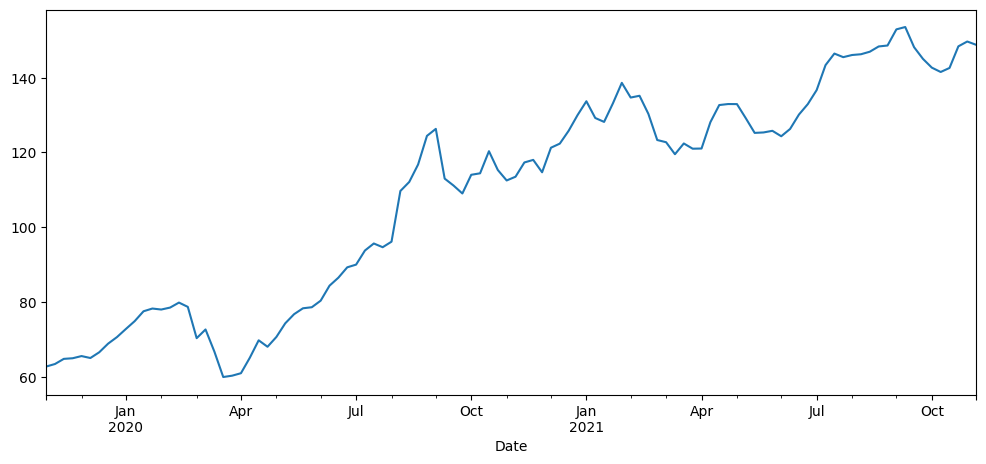

In [31]:
apple.plot()

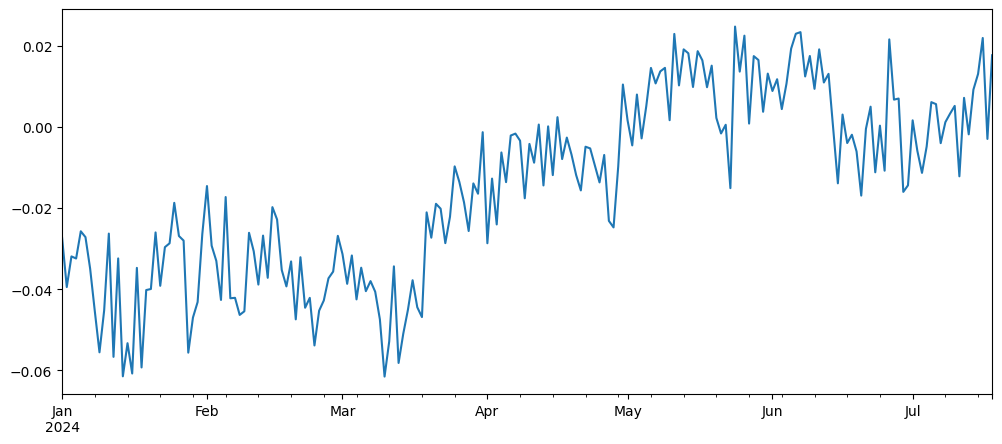

In [ ]:
df = pd.read_csv('../../dados/AR_Exemplo.csv')
Y = pd.Series(df['preco_diff'])
Y.index = pd.date_range(start='2024-01-01', periods=200)
plt.rcParams["figure.figsize"] = [12, 5]
Y.plot()
plt.show()

                               SARIMAX Results                                
Dep. Variable:             preco_diff   No. Observations:                  200
Model:                 ARIMA(7, 0, 1)   Log Likelihood                 640.052
Date:                Tue, 25 Mar 2025   AIC                          -1260.104
Time:                        13:12:08   BIC                          -1227.121
Sample:                    01-01-2024   HQIC                         -1246.756
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.015     -0.901      0.368      -0.043       0.016
ar.L1          0.2539      1.530      0.166      0.868      -2.746       3.253
ar.L2          0.3931      0.556      0.707      0.4

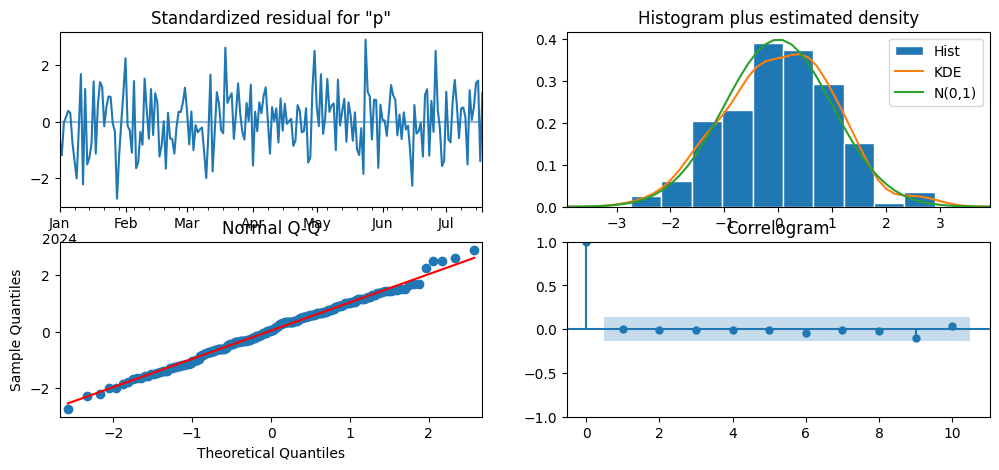

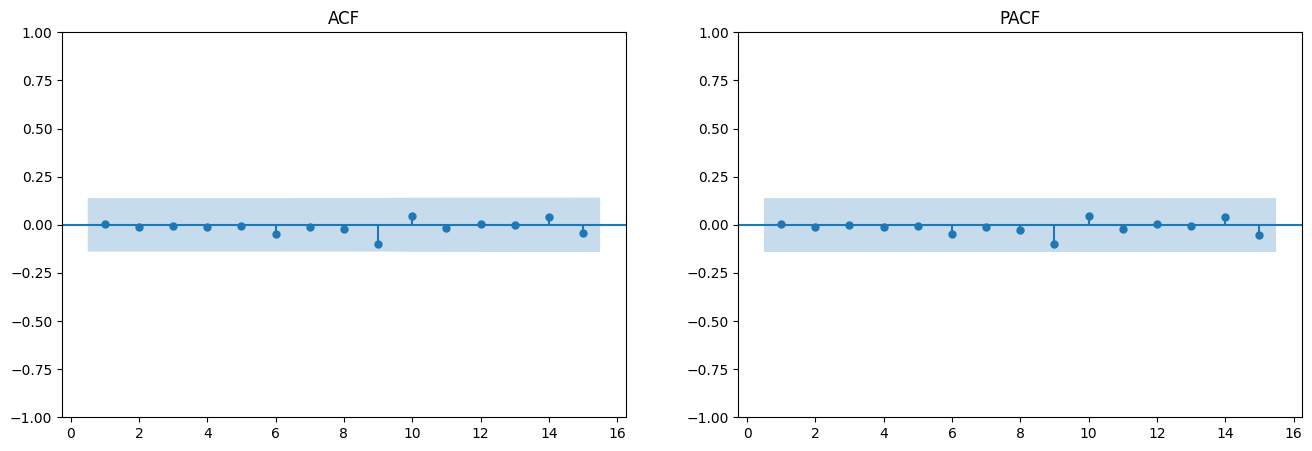

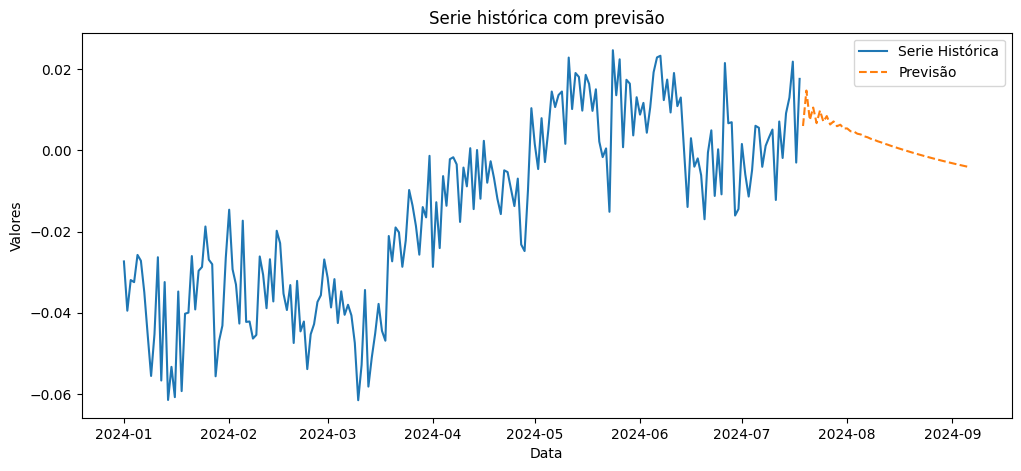

In [43]:
serie = Y
model = ARIMA(serie, order = (7,0,1)).fit()
diagnostico(model)
previsao = model.forecast(50)
plot_forecast(serie,previsao)

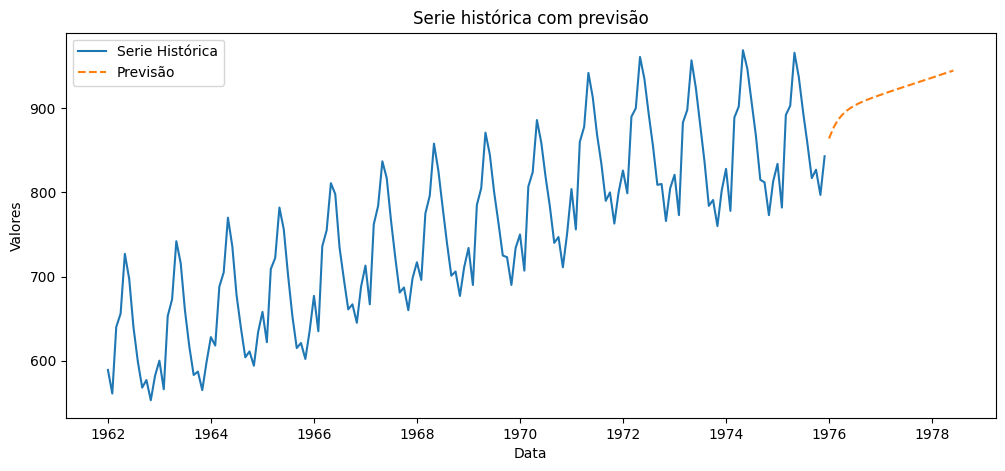

In [ ]:
milk = pd.read_csv('../../dados/milk_production.csv')
milk.index = pd.to_datetime(milk['month'])
milk.index.freq = 'MS'
milk_prod = pd.Series(milk['production'], name="produção de leite")
serie = milk_prod
model = ARIMA(serie, order = (1,0,1), trend='ct').fit()
previsao = model.forecast(30)
plot_forecast(serie,previsao)

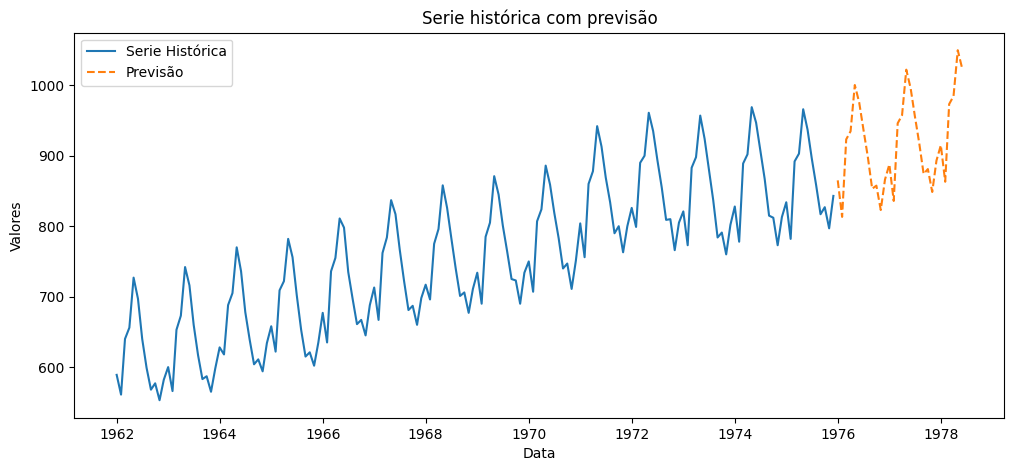

In [ ]:
milk = pd.read_csv('../../dados/milk_production.csv')
milk.index = pd.to_datetime(milk['month'])
milk.index.freq = 'MS'
milk_prod = pd.Series(milk['production'], name="produção de leite")
serie = milk_prod
model = ARIMA(serie, order = (10,1,1), seasonal_order=(1,1,0,12)).fit()
previsao = model.forecast(30)
plot_forecast(serie,previsao)

                                     SARIMAX Results                                      
Dep. Variable:                  produção de leite   No. Observations:                  168
Model:             ARIMA(10, 1, 1)x(1, 1, [], 12)   Log Likelihood                -534.023
Date:                            Tue, 25 Mar 2025   AIC                           1094.046
Time:                                    13:45:47   BIC                           1133.610
Sample:                                01-01-1962   HQIC                          1110.116
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4578      1.001     -0.457      0.647      -2.419       1.503
ar.L2         -0.0412      0.262   

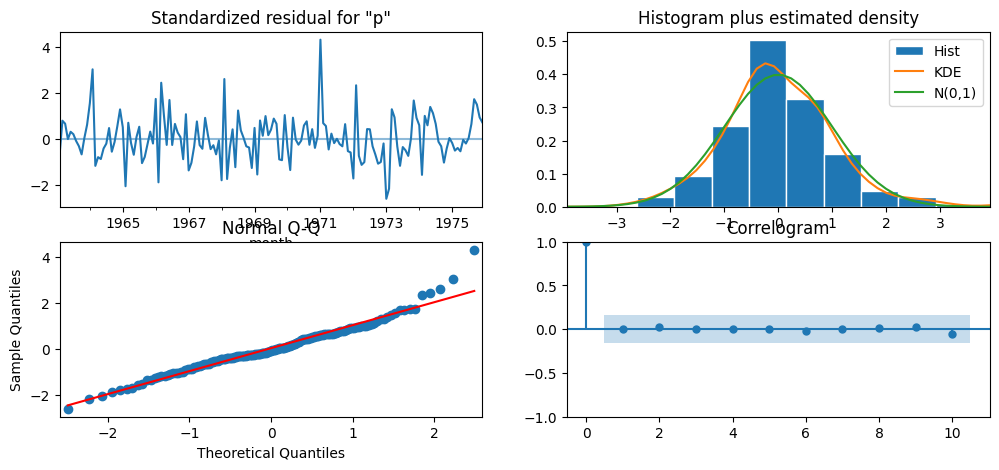

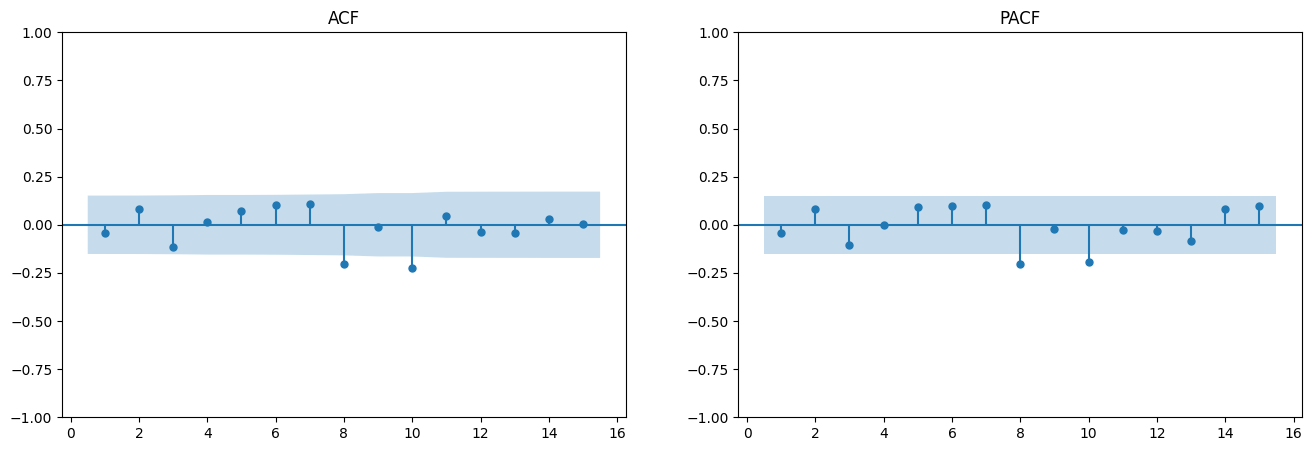

In [66]:
diagnostico(model)

In [6]:
train, test = pm.model_selection.train_test_split(milk, test_size=0.10)

In [7]:
train

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-03-01,889
1974-04-01,902
1974-05-01,969


In [8]:
test

,production
month,
1974-08-01,867
1974-09-01,815
1974-10-01,812
1974-11-01,773
1974-12-01,813
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903


In [9]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -475.008
Date:                            Mon, 24 Mar 2025   AIC                            956.016
Time:                                    22:51:49   BIC                            964.798
Sample:                                01-01-1962   HQIC                           959.585
                                     - 07-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2714      0.082     -3.326      0.001      -0.431      -0.111
ma.S.L12      -0.6233      0.079     -7.908      0.000      -0.778      -0.469
sigma2        54.7638      5.498      9.960      0.000      43.987      65.540
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.78
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.74
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

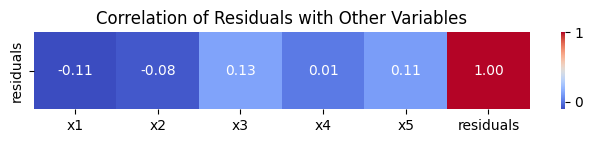

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data for the variables
data = {
    'x1': np.random.rand(100),
    'x2': np.random.rand(100),
    'x3': np.random.rand(100),
    'x4': np.random.rand(100),
    'x5': np.random.rand(100),
    'residuals': np.random.rand(100)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()
residuals_correlation = correlation_matrix.loc[['residuals']]

# Create a heatmap
plt.figure(figsize=(8, 1))  # Adjust height for a single row
sns.heatmap(residuals_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, xticklabels=True, yticklabels=True)

# Add a title
plt.title("Correlation of Residuals with Other Variables")

# Show the heatmap
plt.show()

In [10]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           stepwise=True,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.04 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.06 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

In [11]:
auto_model = pm.auto_arima(train, 
                           seasonal=True, 
                           m=12, 
                           test='adf', 
                           stepwise=True,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.04 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.06 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

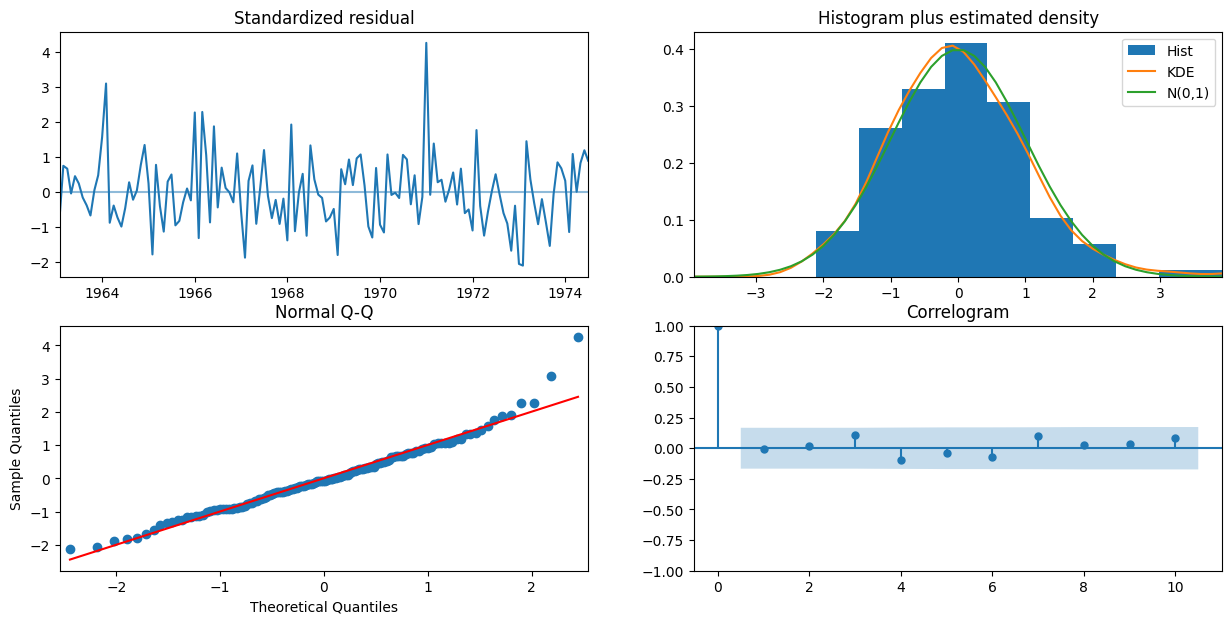

In [12]:
auto_model.plot_diagnostics(figsize=(15,7)); plt.show()

In [ ]:
from typing import Callable

def plot_ts_w_ho(series: pd.Series, fitted_values: pd.Series, forecast: pd.Series, holdout: int, title: str) -> None:
    """
    Plota uma série temporal com período de holdout, valores ajustados e previsão.

    Parâmetros:
    series (pd.Series): Os dados originais da série temporal.
    fitted_values (pd.Series): Os valores ajustados pelo modelo.
    forecast (pd.Series): Os valores previstos pelo modelo.
    holdout (int): O número de períodos a serem mantidos para validação.
    title (str): O título do gráfico.
    """
    holdout_start = series.index[-holdout]
    plt.figure(figsize=(15, 8))
    plt.scatter(series.index, series, color='blue', label='Dados reais')
    plt.plot(fitted_values.index, fitted_values, color='green', linestyle='-', label='Ajuste do modelo')
    plt.plot(forecast.index, forecast, color='green', linestyle='--', label='Previsão')
    plt.axvline(holdout_start, color='red', linestyle='--', lw=2)
    plt.axvspan(holdout_start, series.index[-1], color='gray', alpha=0.3)
    plt.xticks(series.index, series.index.strftime('%b %Y'), rotation=45, ha='right', fontsize=8)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def mse(forecast: pd.Series, real: pd.Series) -> float:
    """
    Calcula o erro quadrático médio entre a previsão e os valores reais.

    Parâmetros:
    forecast (pd.Series): Os valores previstos.
    real (pd.Series): Os valores reais.

    Retorna:
    float: O erro quadrático médio.
    """
    forecast = forecast.flatten()
    real = real.flatten()
    return np.mean((forecast - real) ** 2).flatten()[0]

def ts_model_plot(series: pd.Series, method: Callable, holdout: int, forecast_periods: int, title: str, *args, **kwargs) -> None:
    """
    Ajusta um modelo de série temporal e plota os resultados com período de holdout.

    Parâmetros:
    series (pd.Series): Os dados originais da série temporal.
    method (Callable): O método do modelo de série temporal a ser usado para ajuste.
    holdout (int): O número de períodos a serem mantidos para validação.
    forecast_periods (int): O número de períodos a serem previstos.
    title (str): O título do gráfico.
    *args: Argumentos posicionais adicionais a serem passados para o método do modelo.
    **kwargs: Argumentos nomeados adicionais a serem passados para o método do modelo.

    Retorna:
    Nenhum
    """
    model = method(series[:-holdout], *args, **kwargs).fit()
    fitted_values = model.fittedvalues
    forecast = model.forecast(forecast_periods)
    mse_holdout = mse(forecast.values[:holdout], series.values[-holdout:])
    plot_ts_w_ho(series,fitted_values, forecast, holdout,f'{title} - MSE = {round(mse_holdout,2)}' )

In [ ]:
holdout = 24
forecast_periods = 24
holdout_start = monthly_data.index[-holdout]
fitted_values = monthly_data[:-holdout].shift(1)
forecast = pd.Series([float(monthly_data.iloc[-holdout-1])]*forecast_periods, index=pd.date_range(start=holdout_start, periods=forecast_periods, freq='MS'))

real_values = monthly_data.values[-holdout:]
forecast_values = forecast.values[:holdout]

error = float(mse(forecast_values, real_values))


$$
\Large \frac{1}{n} \sum\limits_{t=1}^{n} \left(Y_{t} - \hat{Y}_{t} \right)^2
$$


$$
\Large (Y_{t} - \hat{Y}_{t})
$$

$$
\Large \sum\limits_{t=1}^{n}(Y_{t} - \hat{Y}_{t})\approx0
$$



$$
\Large \frac{1}{n}\sum\limits_{t=1}^{n}|Y_{t} - \hat{Y}_{t}|
$$


$$
\Large \frac{1}{n}\sum\limits_{t=1}^{n}|\frac{Y_{t} - \hat{Y}_{t}}{\hat{Y}_{t}}|
$$


$$
\Large L = \prod_{i=1}^{n} P(y_i \mid \theta)
$$

$$
\Large \mathcal{L} = \prod_{i=1}^{n} f(y_i \mid \theta)
$$

$$
\large 2k - 2\ln(\hat L)
$$

$$
\large k\ln (n) - 2\ln(\hat L)
$$

$$
\text{AIC} + \frac{2k(k+1)}{n-k-1}
$$

$$
\large 2k\ln(\ln(n))-2\ln(L) 
$$